In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# This code block is importing various libraries and modules that are commonly used in machine learning and computer vision tasks. 
from pandas.core.common import flatten
import copy
import numpy as np
import random

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

from PIL import Image 
import glob
from pathlib import Path
from tqdm import tqdm

C:\Users\ankit\miniconda3\envs\ds\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
    
# train_transforms = transforms.Compose([transforms.RandomRotation(30),
#                                       transforms.RandomResizedCrop(224),
#                                       transforms.RandomHorizontalFlip(),
#                                       transforms.ToTensor()])

# test_transforms = transforms.Compose([transforms.RandomRotation(30),
#                                      transforms.RandomResizedCrop(224),
#                                      transforms.ToTensor()])


In [3]:
# train_data = datasets.ImageFolder('train',transform = train_transforms )
# test_data = datasets.ImageFolder('test',transform = test_transforms )

In [4]:
# trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [5]:
# data_iter = iter(trainloader)

# images, labels = next(data_iter)


# fig, axes = plt.subplots(figsize=(10, 4), ncols=4)
# for ii in range(4):
#     ax = axes[ii]
#     image = images[ii].permute(1, 2, 0)  # Move the channels to the last dimension
#     ax.imshow(image)
#     ax.axis('on')

# plt.show()


In [6]:

# print(len(train_data), len(test_data))

In [7]:
#check our images shape
# train_data[0][0].shape

 The code is importing the `os` module, which provides a way to interact with the operating system. It then defines a variable `image_path` which is set to the path "data". It also defines two more variables `train_dir` and `test_dir` which are set to specific paths within the "data" directory.


In [8]:
import os

image_path = Path("data")
train_dir = "data/train"
test_dir =  "data/test"

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f" There are {len(dirnames)} directories {len(filenames)} images in '{dirpath}'. ")

 The function `walk_through_dir(image_path)` is likely designed to traverse through a directory and perform some action on each file or image within that directory. The specific details of what the function does would depend on the implementation.


In [9]:
walk_through_dir(image_path)

 There are 3 directories 6 images in 'data'. 
 There are 0 directories 3 images in 'data\.ipynb_checkpoints'. 
 There are 2 directories 0 images in 'data\test'. 
 There are 0 directories 70 images in 'data\test\cats'. 
 There are 0 directories 70 images in 'data\test\dogs'. 
 There are 2 directories 0 images in 'data\train'. 
 There are 0 directories 279 images in 'data\train\cats'. 
 There are 0 directories 278 images in 'data\train\dogs'. 


In [10]:
# The code is creating two new variables `train_dir` and `test_dir`.
train_dir = image_path / "train"
test_dir =  image_path / "test"
image_path
train_dir, test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))

In [11]:
# The line `from PIL import Image` is importing the `Image` module from the `PIL` package. This allows you to use the functionality provided by the `Image` module, such as opening, manipulating, and saving images.
from PIL import Image
# random.seed(42)
# The code is creating a list called `image_path_list` that contains the file paths of all the .jpg files in the specified directory (`image_path`). The `glob` function is used to find all the .jpg files in the directory.
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_random = random.choice(image_path_list)

print(image_path_random)

data\train\cats\cat_546.jpg


In [12]:
# Get image class name from path name
image_class = image_path_random.parent.stem
print(image_class)

cats


In [13]:
#open image 
img = Image.open(image_path_random)

 Random image path: data\train\cats\cat_546.jpg 
 Image class: cats 
 Image height: 260 
 Image width: 260 


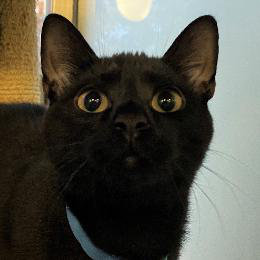

In [14]:
#print metadata
print(f" Random image path: {image_path_random} ")
print(f" Image class: {image_class} ")
print(f" Image height: {img.height} ")
print(f" Image width: {img.width} ")
img

 The code is converting an image `img` into a NumPy array using `np.array(img)`. Then, it creates a figure with a size of 6x9 inches using `plt.figure(figsize=(6,9))`. It displays the image array using `plt.imshow(img_as_array)`. Finally, it sets the title of the figure to include the image class and shape using `plt.title(f" Image class:{image_class}|Image shape:{img_as_array.shape} -> [height, width, color_channels] ")`.


Text(0.5, 1.0, ' Image class:cats|Image shape:(260, 260, 3) -> [height, width, color_channels] ')

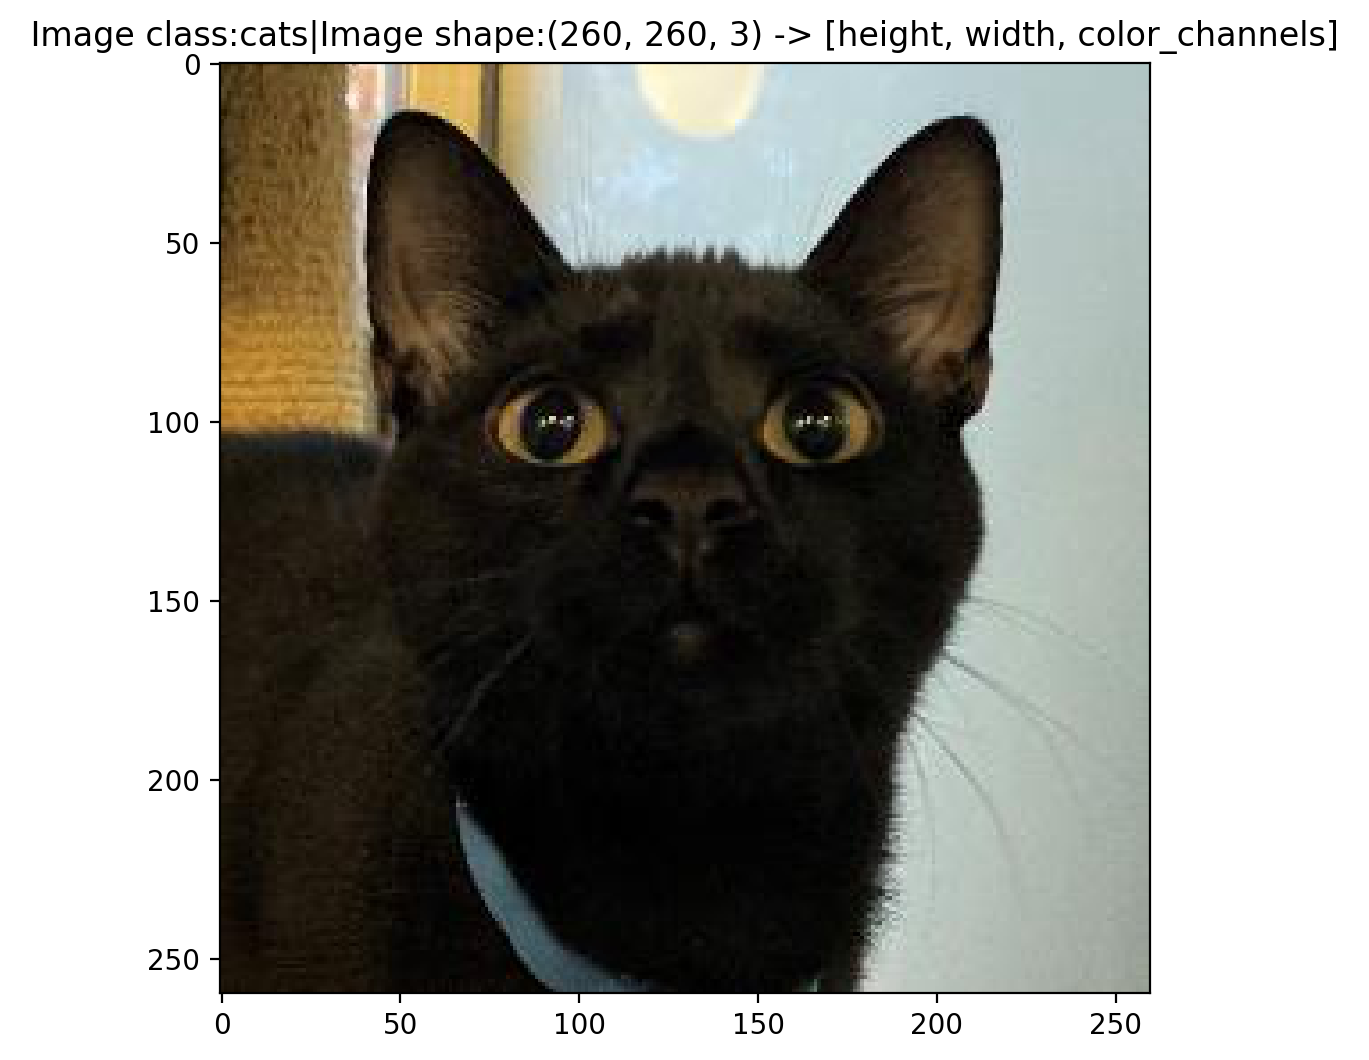

In [15]:
img_as_array = np.array(img)
plt.figure(figsize=(6,9))
plt.imshow(img_as_array)
plt.title(f" Image class:{image_class}|Image shape:{img_as_array.shape} -> [height, width, color_channels] ")

### Transforming Data with torchvision.transforms

In [16]:
# image transfform

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

 `data_transform(img)` is a function that takes an image `img` as input and performs some kind of transformation on the data of the image. The specific details of the transformation would depend on the implementation of the `data_transform` function.


In [17]:
data_transform(img)

tensor([[[0.2784, 0.3059, 0.3373,  ..., 0.6980, 0.6980, 0.6941],
         [0.3020, 0.3059, 0.3373,  ..., 0.6980, 0.6980, 0.6980],
         [0.2863, 0.3216, 0.3412,  ..., 0.6980, 0.6980, 0.7059],
         ...,
         [0.1020, 0.0941, 0.0863,  ..., 0.6314, 0.6118, 0.6039],
         [0.1059, 0.1020, 0.0941,  ..., 0.6314, 0.6078, 0.6039],
         [0.1059, 0.1020, 0.1020,  ..., 0.6275, 0.6078, 0.5961]],

        [[0.2196, 0.2314, 0.2471,  ..., 0.7765, 0.7765, 0.7725],
         [0.2392, 0.2314, 0.2471,  ..., 0.7765, 0.7765, 0.7725],
         [0.2235, 0.2471, 0.2510,  ..., 0.7765, 0.7765, 0.7725],
         ...,
         [0.0667, 0.0588, 0.0510,  ..., 0.6588, 0.6392, 0.6353],
         [0.0745, 0.0706, 0.0627,  ..., 0.6549, 0.6353, 0.6353],
         [0.0745, 0.0706, 0.0706,  ..., 0.6510, 0.6314, 0.6275]],

        [[0.0941, 0.1020, 0.1020,  ..., 0.7725, 0.7725, 0.7686],
         [0.1137, 0.0980, 0.0980,  ..., 0.7725, 0.7725, 0.7686],
         [0.0980, 0.1137, 0.1020,  ..., 0.7725, 0.7725, 0.

 The code defines a function called `plot_transformed_images` that takes in four parameters: `image_paths`, `transform`, `n`, and `seed`.


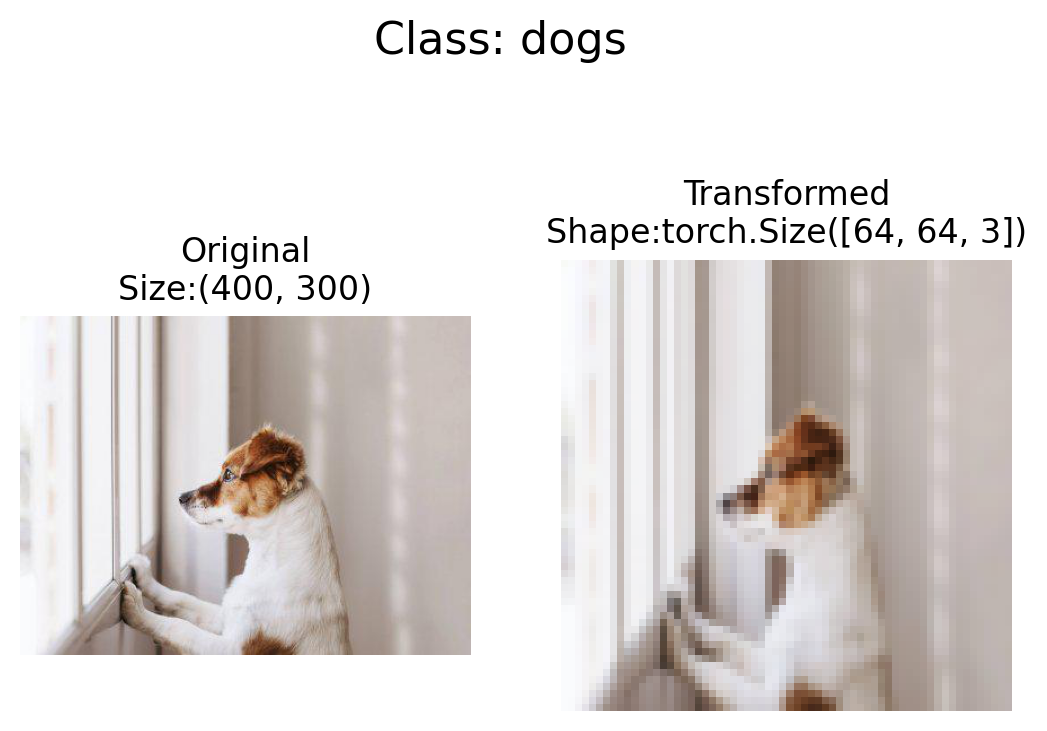

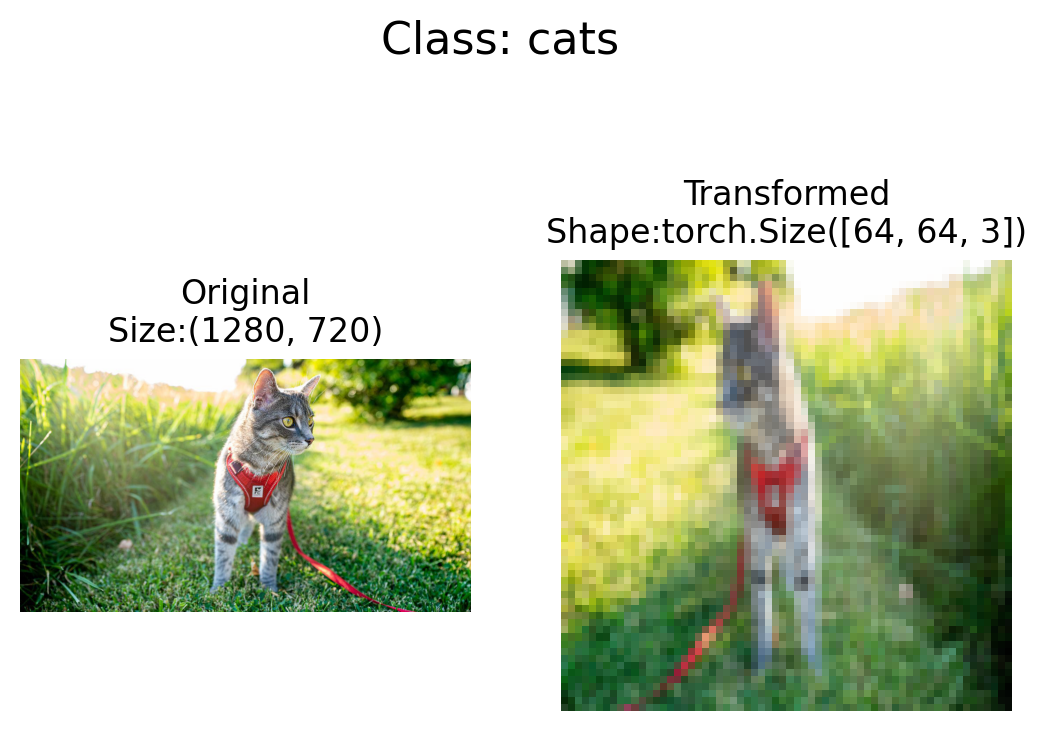

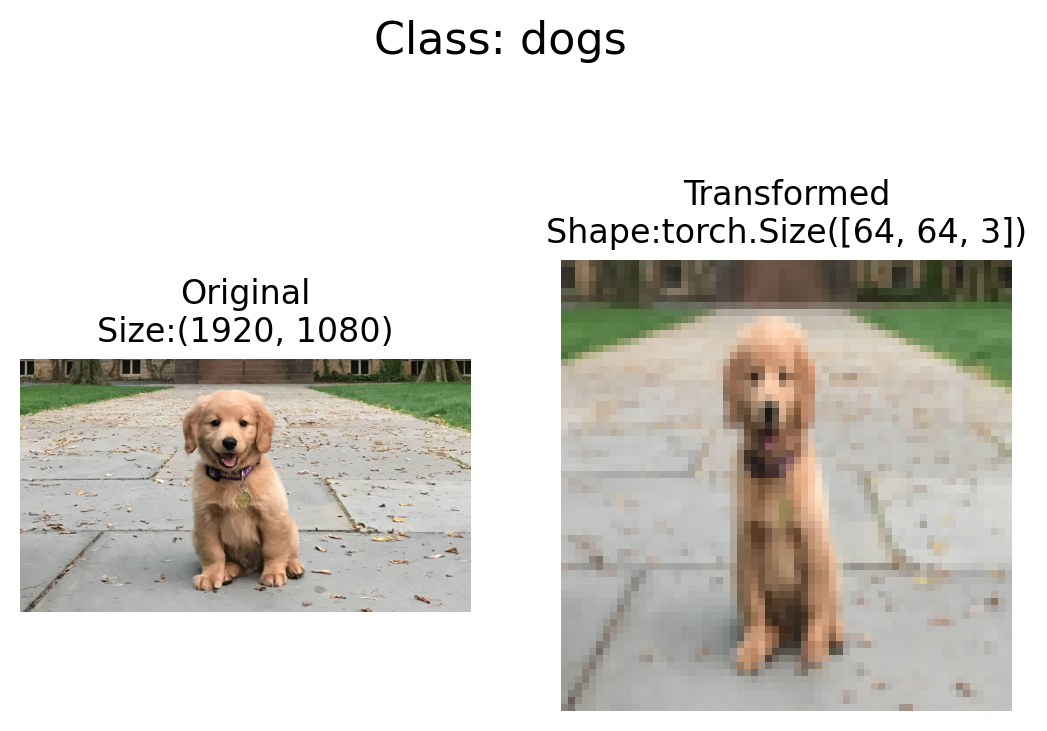

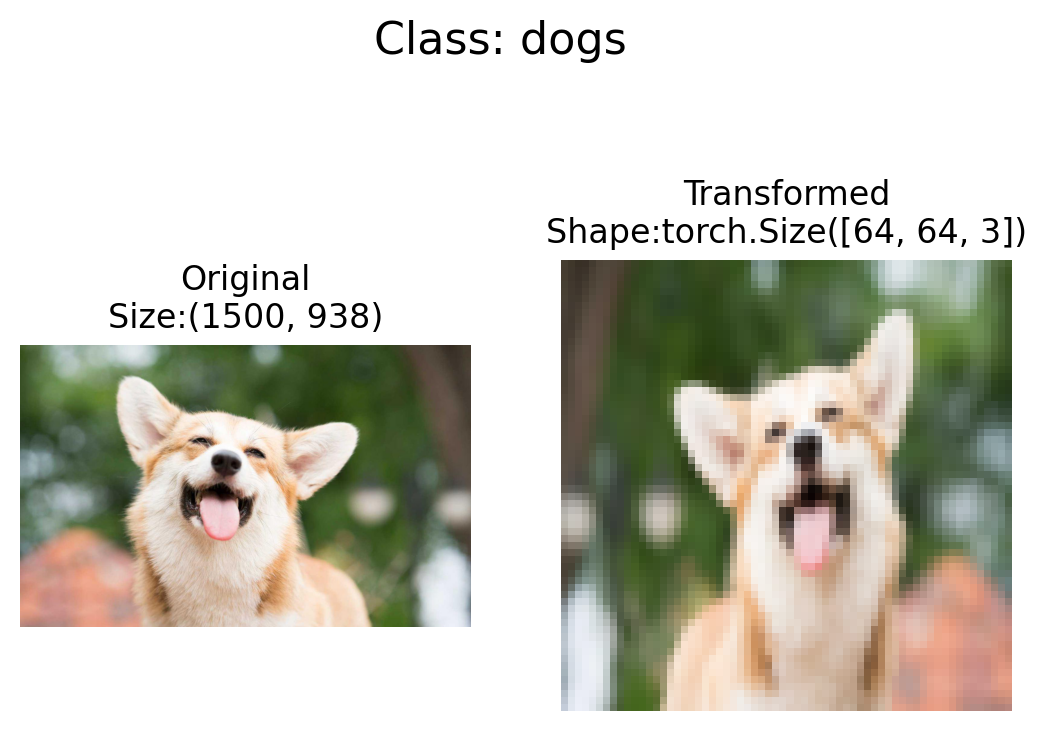

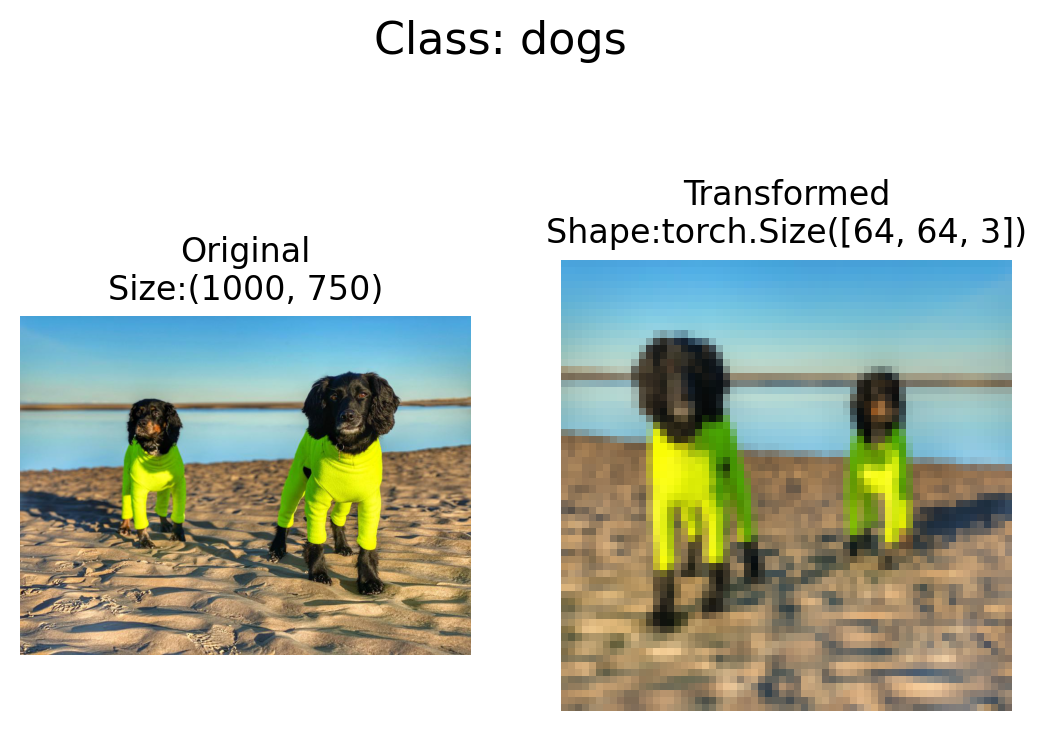

In [18]:
def plot_transformed_images(image_paths:list,transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    image_path_random = random.sample(image_paths, k = n)
    for image_path in image_path_random:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize:{f.size}")
            ax[0].axis(False)
            
            
            #Trnasformed and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)
            
            
# The code is calling the function `plot_transformed_images` with the following arguments:
plot_transformed_images(image_paths = image_path_list,
                       transform = data_transform,
                       n=5,
                       seed = 10)

In [19]:
#The code is creating two instances of the `ImageFolder` class from the `datasets` module.
train_data = datasets.ImageFolder(root = train_dir,transform = data_transform )
test_data = datasets.ImageFolder(root =test_dir,transform = data_transform )

train_data

Dataset ImageFolder
    Number of datapoints: 557
    Root location: data\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [20]:
#get class name as list
class_names = train_data.classes
class_names

['cats', 'dogs']

In [21]:
# get class name as ddict
class_dict = train_data.class_to_idx
class_dict


{'cats': 0, 'dogs': 1}

In [22]:
#length of our dataset
len(train_data),len(test_data)

(557, 140)

In [23]:
train_data.samples[0]

('data\\train\\cats\\cat_10.jpg', 0)

 The code is accessing the first element of the `train_data` list, which is a tuple. It assigns the first element of the tuple to the variable `img` and the second element to the variable `label`.


In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image Shape:{img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label : {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.6353, 0.7647, 0.7608,  ..., 0.6431, 0.6549, 0.6588],
         [0.6431, 0.7686, 0.7490,  ..., 0.6549, 0.6627, 0.6667],
         [0.6392, 0.7725, 0.7451,  ..., 0.6667, 0.6706, 0.6745],
         ...,
         [0.7804, 0.7804, 0.7843,  ..., 0.7647, 0.7647, 0.7647],
         [0.7804, 0.7843, 0.7804,  ..., 0.7686, 0.7686, 0.7686],
         [0.7804, 0.7804, 0.7765,  ..., 0.7686, 0.7608, 0.7569]],

        [[0.4980, 0.7373, 0.7529,  ..., 0.6588, 0.6902, 0.6941],
         [0.5137, 0.7451, 0.7412,  ..., 0.6745, 0.6980, 0.7020],
         [0.5098, 0.7451, 0.7451,  ..., 0.6863, 0.7059, 0.7098],
         ...,
         [0.7961, 0.7961, 0.8000,  ..., 0.7373, 0.7333, 0.7294],
         [0.7961, 0.8000, 0.7961,  ..., 0.7333, 0.7333, 0.7333],
         [0.7961, 0.7961, 0.7882,  ..., 0.7451, 0.7412, 0.7373]],

        [[0.4275, 0.7137, 0.7373,  ..., 0.6392, 0.6745, 0.6824],
         [0.4431, 0.7216, 0.7294,  ..., 0.6588, 0.6863, 0.6902],
         [0.4353, 0.7255, 0.7294,  ..., 0.6

Orginal Shape:torch.Size([3, 64, 64]) -> [color_channels,height,width]
Image permute:torch.Size([64, 64, 3]) -> [height,width,color_channels]


Text(0.5, 1.0, 'cats')

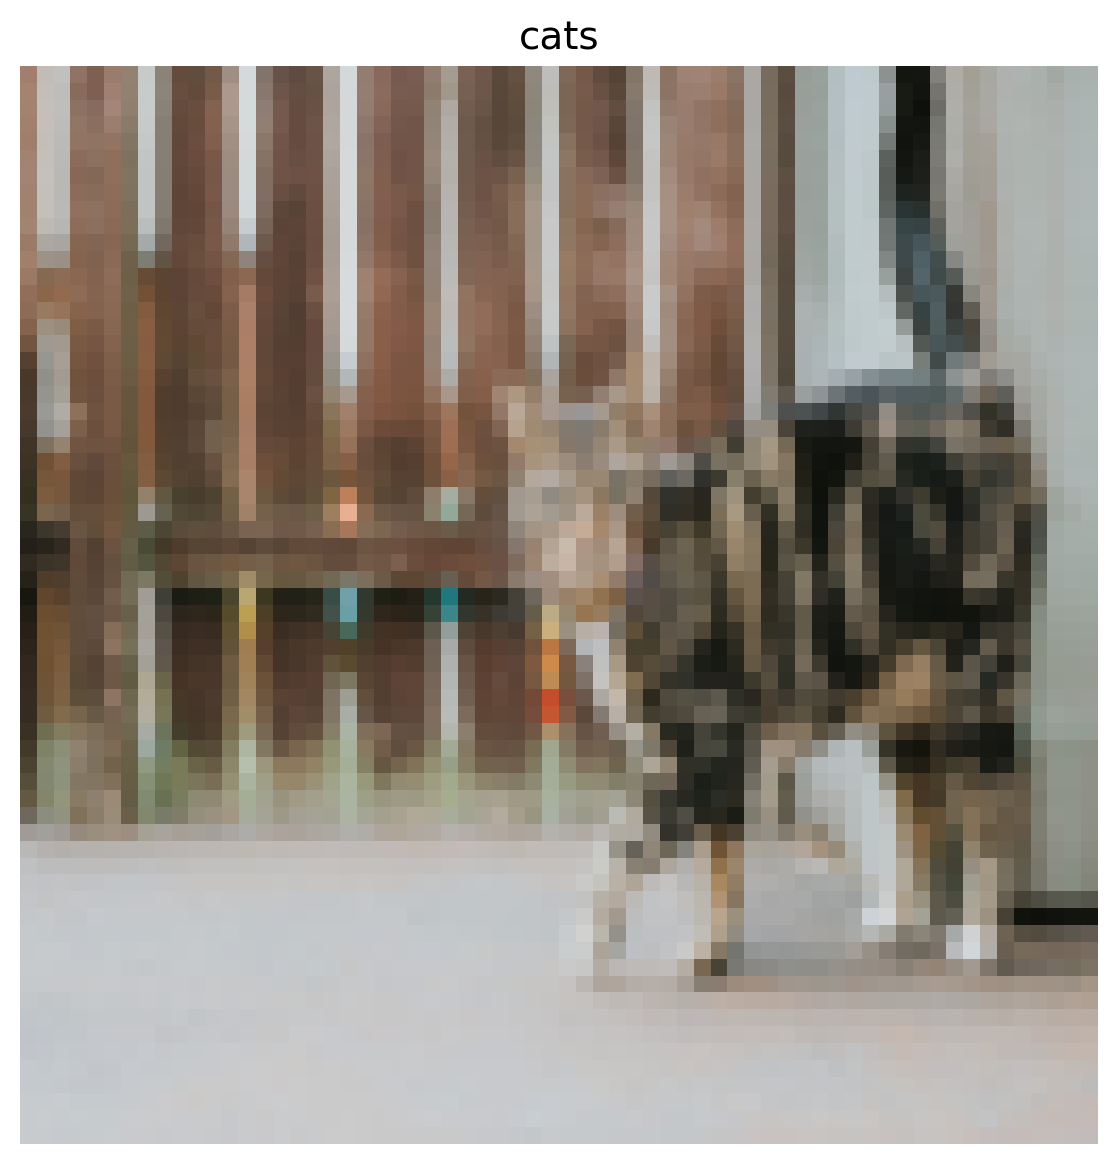

In [25]:
#Reaarange the order dimensions 
img_permute = img.permute(1,2,0)

# printout different shapes
print(f"Orginal Shape:{img.shape} -> [color_channels,height,width]")
print(f"Image permute:{img_permute.shape} -> [height,width,color_channels]")

#plotting image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label],fontsize=14)

### Turn loaded images into `Dataloaders`

A `Dataloader` is going to help us turn our `Dataset`'s into iterables and we can customize  the `batch_size` so our model can see `batch_size` iamges at a time.

In [26]:
# !nvidia-smi
os.cpu_count()

8

In [27]:
# The code is creating data loaders for training and testing datasets.
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers = 2,
                             shuffle = True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size= BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1979a61bdf0>,
 <torch.utils.data.dataloader.DataLoader at 0x1979a61bf70>)

In [28]:
# The code is calculating the length of the `train_dataloader` and `test_dataloader` objects.
len(train_dataloader),len(test_dataloader)

(557, 140)

In [29]:
# The code is retrieving the next batch of data from the `train_dataloader` iterator.
img, label = next(iter(train_dataloader))

print(f" Image Shape: {img.shape} -> [batch_size,color_channels,height,width] ")
print(f" Label Shape: {label.shape}")

 Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size,color_channels,height,width] 
 Label Shape: torch.Size([1])


### Loading Image with `Custom_Dataset`

In [30]:
from torch.utils.data import Dataset
from typing import Tuple,Dict,List
# Instance of torchvision.dataset.ImageFolder()
train_data.classes, train_data.class_to_idx

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

In [31]:
#setup path for target directory

target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class  name from the target directory

class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target directory: data\train


['cats', 'dogs']

In [32]:
def find_classes(directory: str) -> Tuple[List[str],Dict[str,int]]:
    #get the clas name by scanning the target directory
    classes = sorted([entry.name for entry in list(os.scandir(target_directory))])
    
    #Raise an error if class name not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find file in the {directory}... please check file structure")
        
    #create a diictinary of index llabels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes) }
    return classes, class_to_idx

In [33]:
find_classes(target_directory)

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

 The code is defining a custom dataset class called `ImageFolderCustom` that inherits from the `Dataset` class. This custom dataset class is designed to work with image data stored in a folder structure, where each subfolder represents a different class.


In [34]:

import pathlib
class ImageFolderCustom(Dataset):
    def __init__(self,targ_dir:str,transform=None):
        #crreate class attribute 
        #get all the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        #setup ttransform
        self.transform = transform
        
        #create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
        
    def load_image(self,index:int) ->Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self,index:int) -> Tuple[torch.Tensor,int]:
        "Return one smaple of data, data snd label(X,y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        
        #transform if necessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx
    

In [35]:
#create trnasform 
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [36]:
#test out ImageFolderCusstom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                     transform = train_transform)
test_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                     transform = test_transform)

In [37]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x1979a6458d0>,
 <__main__.ImageFolderCustom at 0x1979a645720>)

In [38]:
#Function to display image 
def display_random_image(dataset:torch.utils.data.Dataset,
                        classes: List[str] = None,
                        n: int =10,
                        display_shape: bool = True,
                        seed: int =None):
    #Adjust display iff n is too high
    if n > 10:
        display_shape = False
        print(f" For display,purpose, n shouldn't be larger than 10, setting to 10 and removing shape display ")
       
    if seed:
        random.seed(seed)
        
    random_samples_idx = random.sample(range(len(dataset)),k=10)
    
    #setu plotting
    plt.figure(figsize=(16,8))
    #Loop throgh random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        #Adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1,2,0)
        
        #plot adjusted sample
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        
        if classes:
            title  = f"class:{classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

 The function `display_random_image` is used to display a random selection of images from the `train_data` dataset. It takes in several parameters:


ValueError: num must be an integer with 1 <= num <= 5, not 6

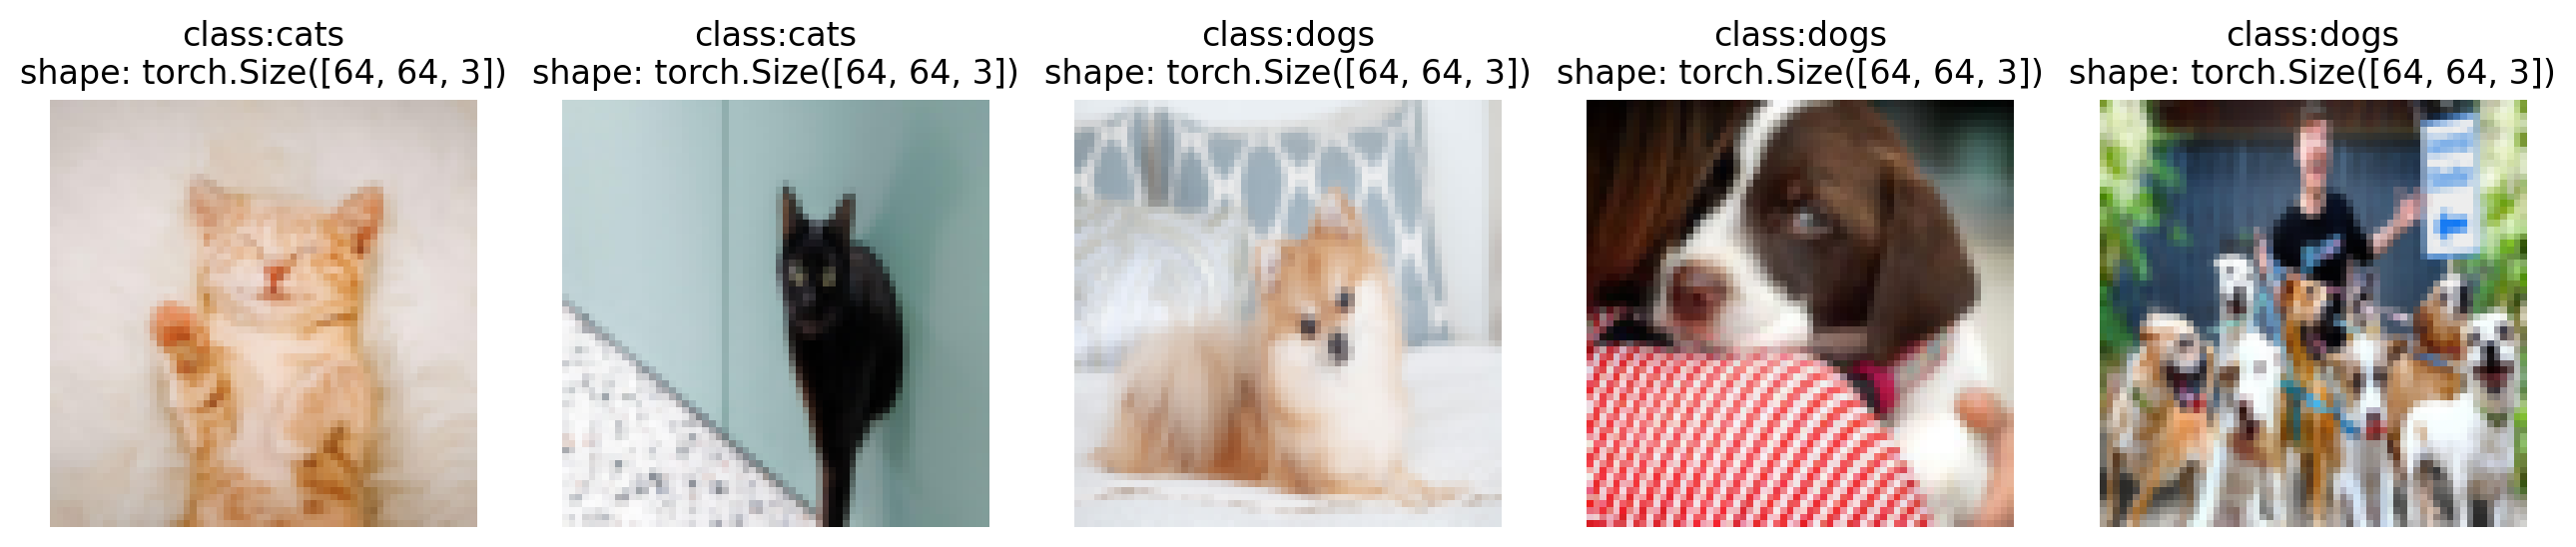

In [39]:
display_random_image(train_data,n=5,classes=class_names,seed=None)

In [40]:
# The code is importing the `DataLoader` class from the `torch.utils.data` module.
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True) 

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle = True)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1979f9e4d60>,
 <torch.utils.data.dataloader.DataLoader at 0x1979f9e63e0>)

In [41]:
# The code is using the `next` function to retrieve the next batch of data from the `train_dataloader_custom` dataloader. It then assigns the batch of images to the variable `img_custom` and the corresponding labels to the variable `label_custom`. Finally, it prints the shapes of `img_custom` and `label_custom`.
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

 ## Other Forms of trransform(Data Augmentation)
  The code is importing the `transforms` module from the `torchvision` library.

In [ ]:

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

`image_path` is likely a variable that stores the path or location of an image file. It can be used in code to reference or access the image file.


In [43]:
image_path


WindowsPath('data')

In [44]:

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/test/cats/cat_1.jpg'),
 WindowsPath('data/test/cats/cat_106.jpg'),
 WindowsPath('data/test/cats/cat_109.jpg'),
 WindowsPath('data/test/cats/cat_113.jpg'),
 WindowsPath('data/test/cats/cat_114.jpg'),
 WindowsPath('data/test/cats/cat_116.jpg'),
 WindowsPath('data/test/cats/cat_118.jpg'),
 WindowsPath('data/test/cats/cat_119.jpg'),
 WindowsPath('data/test/cats/cat_124.jpg'),
 WindowsPath('data/test/cats/cat_140.jpg')]

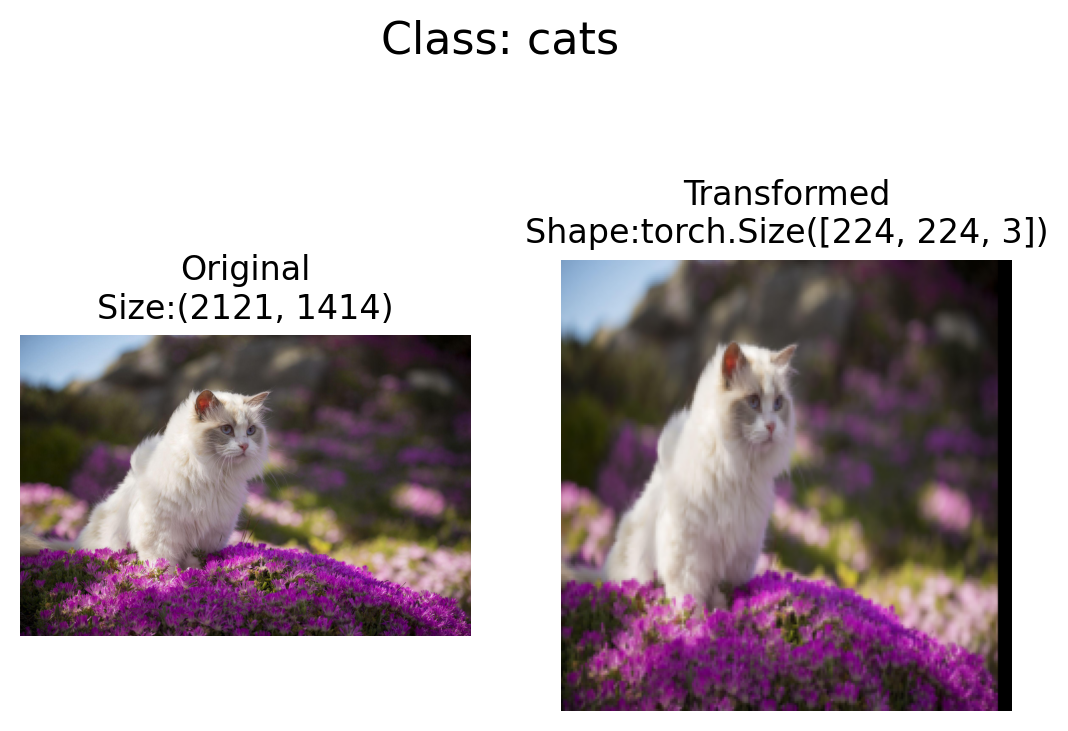

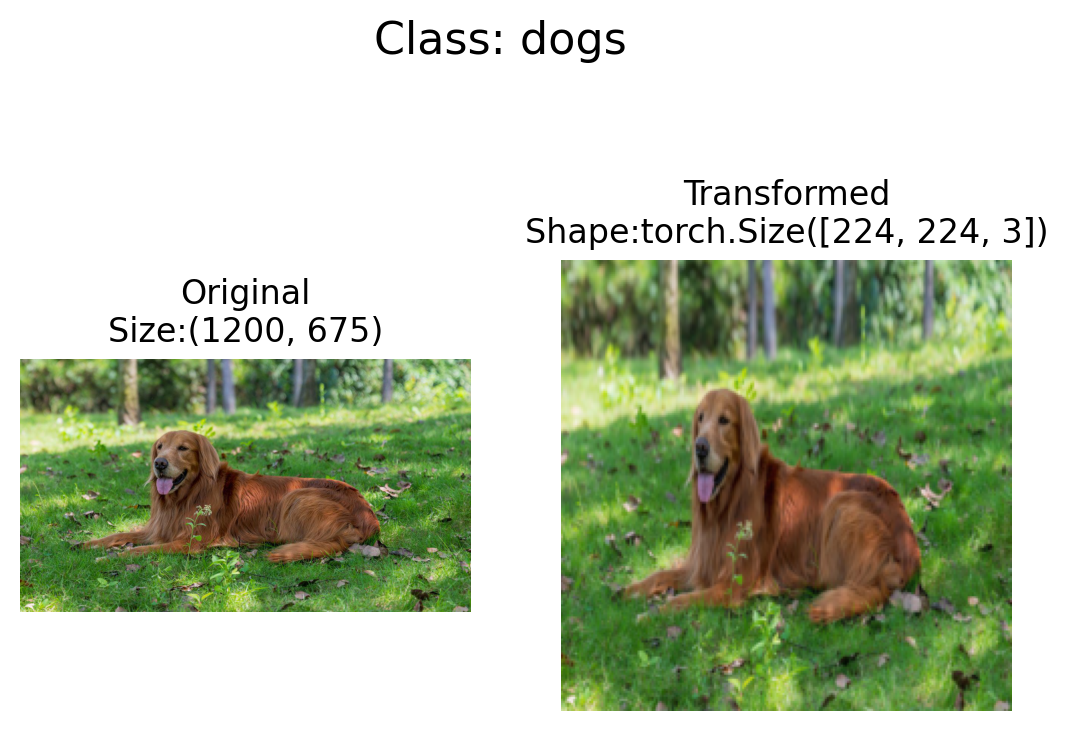

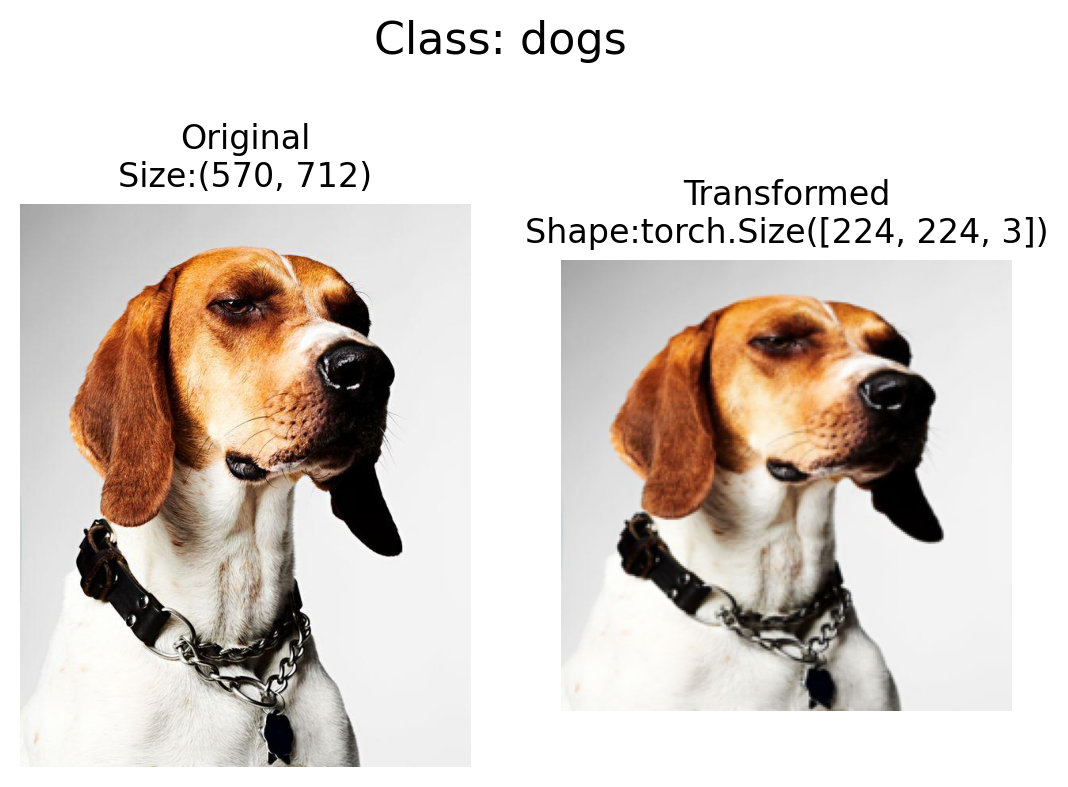

In [45]:
#plot random transformes image
plot_transformed_images(
    image_paths=image_path_list,
    transform = train_transform,
    n=3,
    seed=100
)

## Creating transforms and loading data for model 0
In model model 0 we use simple transform technique

In [46]:
# creating siimplle transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [47]:
#Load and transformmm data 
train_data_simple = datasets.ImageFolder(root = train_dir,
                                       transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                       transform = simple_transform)

# Turn the dataset into dataloader
import os
from torch.utils.data import DataLoader

#setup batch size and number of works 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True) 

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)


The code defines a class called `TinyVGG` which is a neural network model architecture. It inherits from the `nn.Module` class in PyTorch.




In [48]:
class TinyVGG(nn.Module):
    #Model architecture copying TinyVGG from CNN Explainer  
    
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, #mat1 and mat2 shapes cannot be multiplied (32x2560 and 10x2) ot fix this error we multiplide it by 16*16
                      out_features=output_shape)
        )
   
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(X))) #operator fusion 

The code is setting the device to either "cuda" if a CUDA-enabled GPU is available, or "cpu" if not. It then sets the random seed to 42 for reproducibility. It creates an instance of the TinyVGG model with the specified input shape, hidden units, and output shape, and moves the model to the selected device. Finally, it prints the model.


In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

 ## Try a forward pass on a singel image (to test the model)
 The code is getting a single image and its corresponding label from the `train_dataloader_simple` dataloader.


In [50]:
## get a single image 
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

`model_0(image_batch.to(device))` is passing the `image_batch` through `model_0` after transferring it to the specified `device`.



In [51]:
model_0(image_batch.to(device))

tensor([[0.0070, 0.0073],
        [0.0085, 0.0096],
        [0.0099, 0.0102],
        [0.0054, 0.0098],
        [0.0054, 0.0064],
        [0.0024, 0.0102],
        [0.0068, 0.0087],
        [0.0066, 0.0066],
        [0.0068, 0.0081],
        [0.0079, 0.0071],
        [0.0088, 0.0085],
        [0.0076, 0.0060],
        [0.0069, 0.0102],
        [0.0070, 0.0089],
        [0.0055, 0.0095],
        [0.0063, 0.0105],
        [0.0079, 0.0104],
        [0.0073, 0.0085],
        [0.0074, 0.0083],
        [0.0067, 0.0078],
        [0.0069, 0.0075],
        [0.0056, 0.0075],
        [0.0081, 0.0107],
        [0.0062, 0.0076],
        [0.0078, 0.0059],
        [0.0052, 0.0116],
        [0.0059, 0.0106],
        [0.0026, 0.0103],
        [0.0065, 0.0081],
        [0.0074, 0.0058],
        [0.0064, 0.0087],
        [0.0058, 0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Using `torchinfo` to get an idea of the shapes going through in our model
The code is checking if the `torchinfo` library is available. If it is available, it imports the library. If it is not available, it installs the `torchinfo` library using pip and then imports it.


In [52]:
# Install torchinfo, import if it's  available
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0,input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

#### Create train and test loops function
* `train_step()` - takes in a model and dataloader and trains the model on the data set

* `test_step()` - takes in a model and dataloader and evaluates the model on the data set

In [53]:
# #create train step 
# def train_step(model:torch.nn.Module,
#                dataloader:torch.utils.data.DataLoader,
#                loss_fn: torch.nn.Module,
#                optimizer: torch.optim.Optimizer,
#                device: device):
#     #put the model in train mode 
#     model.train()
    
#     #setup train loss and train accuracy values 
#     train_loss, train_acc = 0,0
    
#     #loop through dataloader data batches  
#     for batch, (X,y) in enumerate(dataloader):
#         #send  data to target device
#         X, y = X.to(device), y.to(device)
        
#         #forward pass 
#         y_pred = model(X) 
        
#         #calvulate the loss     
#         loss = loss_fn(y_pred, y)
#         train_acc += loss.item()
        
#         #optimizer zero frad
#         optimizer.zero_grad()
        
#         #loss backward
#         loss.backward()
        
#         #optimizer step 
#         optimizer.step()
        
#         #claculate accuracy metric
#         y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim =1)
#         train_acc += (y_pred_class==y).sum().item()/len(y_pred_class)
#     #Adjust metrics to get average loss and accuracy per match
#     train_loss = train_loss / len(dataloader)
#     train_acc = train_acc / len(dataloader)
#     return train_loss, train_acc 

In [54]:
# The code defines a function called `train_step` that performs a single training step for a given model.
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: device):
    model.train()
    
    train_loss, train_acc = 0,0
    
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred_class)
    
    #per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    
    return train_loss, train_acc

In [55]:
# create a test step 
def test_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: device):
    #put  model in eval mode
    model.eval()
    
    #setup  test loss and test accuracy values
    test_loss, test_acc = 0,0
    
    #loop through dataloader data batches  
    for batch, (X,y) in enumerate(dataloader):
        #send  data to target device
        X, y = X.to(device), y.to(device)
        
        #forward pass 
        test_pred_logits = model(X) 
        
        #calvulate the loss     
        loss = loss_fn(test_pred_logits, y) 
        test_loss += loss.item()

        
        #claculate accuracy metric
        test_pred_labels = test_pred_logits.argmax(dim =1)
        test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)
    #Adjust metrics to get average loss and accuracy per match
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc 

##### combining train step and test step in one function

In [56]:
#The code is defining a function called `train` that is used to train a neural network model.
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model_0,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model_0,
                                         dataloader=test_dataloader,
                                         loss_fn=loss_fn,
                                         device=device)
        
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train acc: {train_acc:.0%} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.0%}")
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
        

The code is creating an instance of the `TinyVGG` model and assigning it to the variable `model_0`. The `TinyVGG` model is being initialized with the following parameters:


In [57]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 40

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

from timeit import default_timer as timer
start_timer = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

stop_timer = timer()
print(f"Total training time: {stop_timer-start_timer:.3f} seconds")

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.7036 | Train acc: 49% | Test loss: 0.6971 | Test acc: 50%
Epoch: 1 | Train Loss: 0.6930 | Train acc: 49% | Test loss: 0.6929 | Test acc: 51%
Epoch: 2 | Train Loss: 0.6982 | Train acc: 49% | Test loss: 0.6929 | Test acc: 51%
Epoch: 3 | Train Loss: 0.6934 | Train acc: 50% | Test loss: 0.6932 | Test acc: 50%
Epoch: 4 | Train Loss: 0.6937 | Train acc: 50% | Test loss: 0.6928 | Test acc: 52%
Epoch: 5 | Train Loss: 0.6933 | Train acc: 48% | Test loss: 0.6930 | Test acc: 52%
Epoch: 6 | Train Loss: 0.6931 | Train acc: 50% | Test loss: 0.6932 | Test acc: 48%
Epoch: 7 | Train Loss: 0.6931 | Train acc: 50% | Test loss: 0.6932 | Test acc: 49%
Epoch: 8 | Train Loss: 0.6933 | Train acc: 50% | Test loss: 0.6933 | Test acc: 48%
Epoch: 9 | Train Loss: 0.6931 | Train acc: 51% | Test loss: 0.6933 | Test acc: 48%
Epoch: 10 | Train Loss: 0.6932 | Train acc: 50% | Test loss: 0.6933 | Test acc: 48%
Epoch: 11 | Train Loss: 0.6931 | Train acc: 50% | Test loss: 0.6933 | Test acc: 51%
Ep

`model_0_results` is likely a variable or object that stores the results or output of a model. It could be used to store various metrics, predictions, or other information generated by the model during its execution.


In [59]:
model_0_results

{'train_loss': [0.7036243809594048,
  0.693028406964408,
  0.6981674200958676,
  0.6933688124020895,
  0.6937083469496833,
  0.6932931310600705,
  0.6931492818726434,
  0.6931423412428962,
  0.6932785014311472,
  0.6931362979941897,
  0.6931685838434432,
  0.6931099262502458,
  0.6931238571802775,
  0.6930594974093967,
  0.692828549279107,
  0.6933837102519141,
  0.6924107339647081,
  0.6929479704962836,
  0.6923252907064226,
  0.6886421905623542,
  0.6776885920100741,
  0.6533098551962111,
  0.6173419588141971,
  0.6007037113110224,
  0.5800764063994089,
  0.5784256276157167,
  0.5663977546824349,
  0.5483892146084044,
  0.569087963965204,
  0.5213554865784116,
  0.5287316491206487,
  0.5135822925302718,
  0.5027746591303084,
  0.47129392623901367,
  0.49456512596872115,
  0.5103152874443266,
  0.5218975875112746,
  0.5005829913748635,
  0.4571597807937198,
  0.44817782938480377],
 'train_acc': [0.4874465811965812,
  0.4931891025641026,
  0.49452457264957267,
  0.4969284188034188,
  0

The code defines a function called `plot_loss_curves` that takes in a dictionary called `results` as input. The `results` dictionary is expected to have four keys: "train_loss", "test_loss", "train_acc", and "test_acc". The values corresponding to these keys are expected to be lists of floating-point numbers.


In [60]:
def plot_loss_curves(results: Dict[str, List[float]]):
    # plots training curve of a result dictionary
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]
    
    epochs = range(len(results["train_loss"]))
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, test_loss, label="Test Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, test_accuracy, label="Test Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

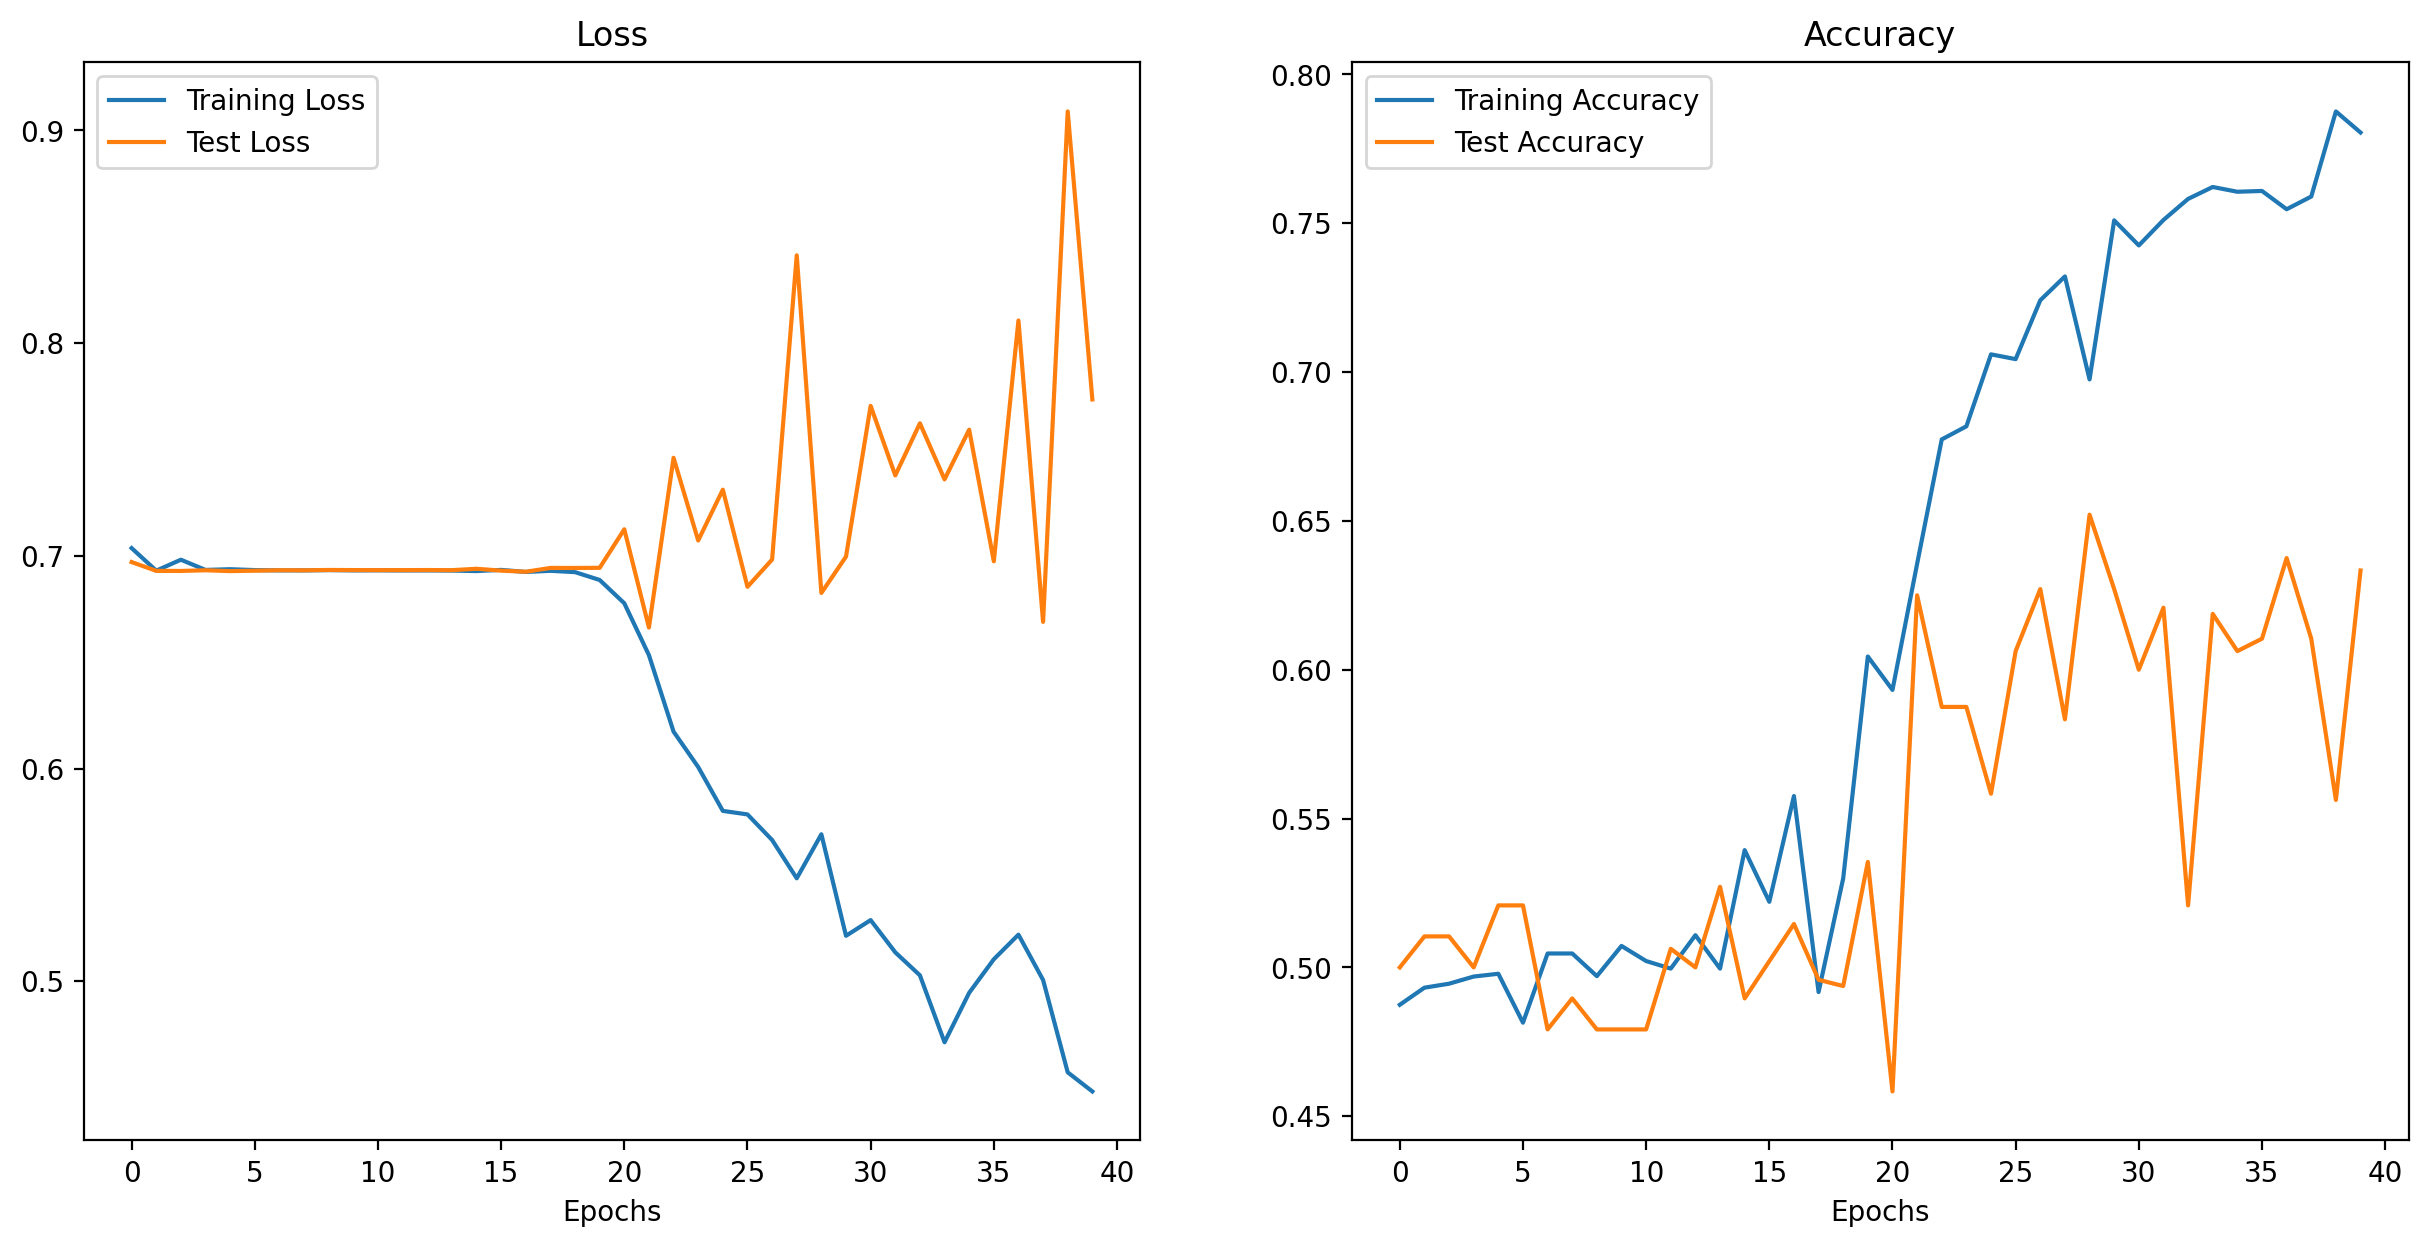

In [61]:
plot_loss_curves(model_0_results)


### TinyVGG with data augmentaion
The code is importing the `transforms` module from the `torchvision` library. It then defines two transformation pipelines: `train_transform_trivial` and `test_transform_simple`.


In [62]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                             transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                             transforms.ToTensor()])

test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
                                           transforms.ToTensor()])

In [63]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [64]:
# This code snippet is importing necessary modules and defining variables for creating data loaders for training and testing datasets.
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=NUM_WORKERS)

The code `torch.manual_seed(42)` and `torch.cuda.manual_seed(42)` are setting the random seed for the torch library. This ensures that the random numbers generated by torch will be the same every time the code is run, which is useful for reproducibility.


In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

In [66]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 40

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.01)

from timeit import default_timer as timer
start_timer = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

stop_timer = timer()
print(f"Total training time: {stop_timer-start_timer:.3f} seconds")

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.6866 | Train acc: 69% | Test loss: 0.7611 | Test acc: 62%
Epoch: 1 | Train Loss: 0.6497 | Train acc: 69% | Test loss: 0.7611 | Test acc: 62%
Epoch: 2 | Train Loss: 0.6737 | Train acc: 69% | Test loss: 0.7611 | Test acc: 62%
Epoch: 3 | Train Loss: 0.6727 | Train acc: 68% | Test loss: 0.7611 | Test acc: 62%
Epoch: 4 | Train Loss: 0.6487 | Train acc: 70% | Test loss: 0.7611 | Test acc: 62%
Epoch: 5 | Train Loss: 0.6997 | Train acc: 70% | Test loss: 0.7611 | Test acc: 62%
Epoch: 6 | Train Loss: 0.6235 | Train acc: 72% | Test loss: 0.7611 | Test acc: 62%
Epoch: 7 | Train Loss: 0.7178 | Train acc: 67% | Test loss: 0.7611 | Test acc: 62%
Epoch: 8 | Train Loss: 0.6266 | Train acc: 72% | Test loss: 0.7611 | Test acc: 62%
Epoch: 9 | Train Loss: 0.7472 | Train acc: 67% | Test loss: 0.7611 | Test acc: 62%
Epoch: 10 | Train Loss: 0.7289 | Train acc: 65% | Test loss: 0.7611 | Test acc: 62%
Epoch: 11 | Train Loss: 0.6013 | Train acc: 72% | Test loss: 0.7611 | Test acc: 62%
Ep

The function `plot_loss_curves(model_1_results)` is likely plotting the loss curves for the results of a model called `model_1`. The loss curves show how the loss (or error) of the model changes over time during the training process. This can help visualize how well the model is learning and if it is converging to a good solution.


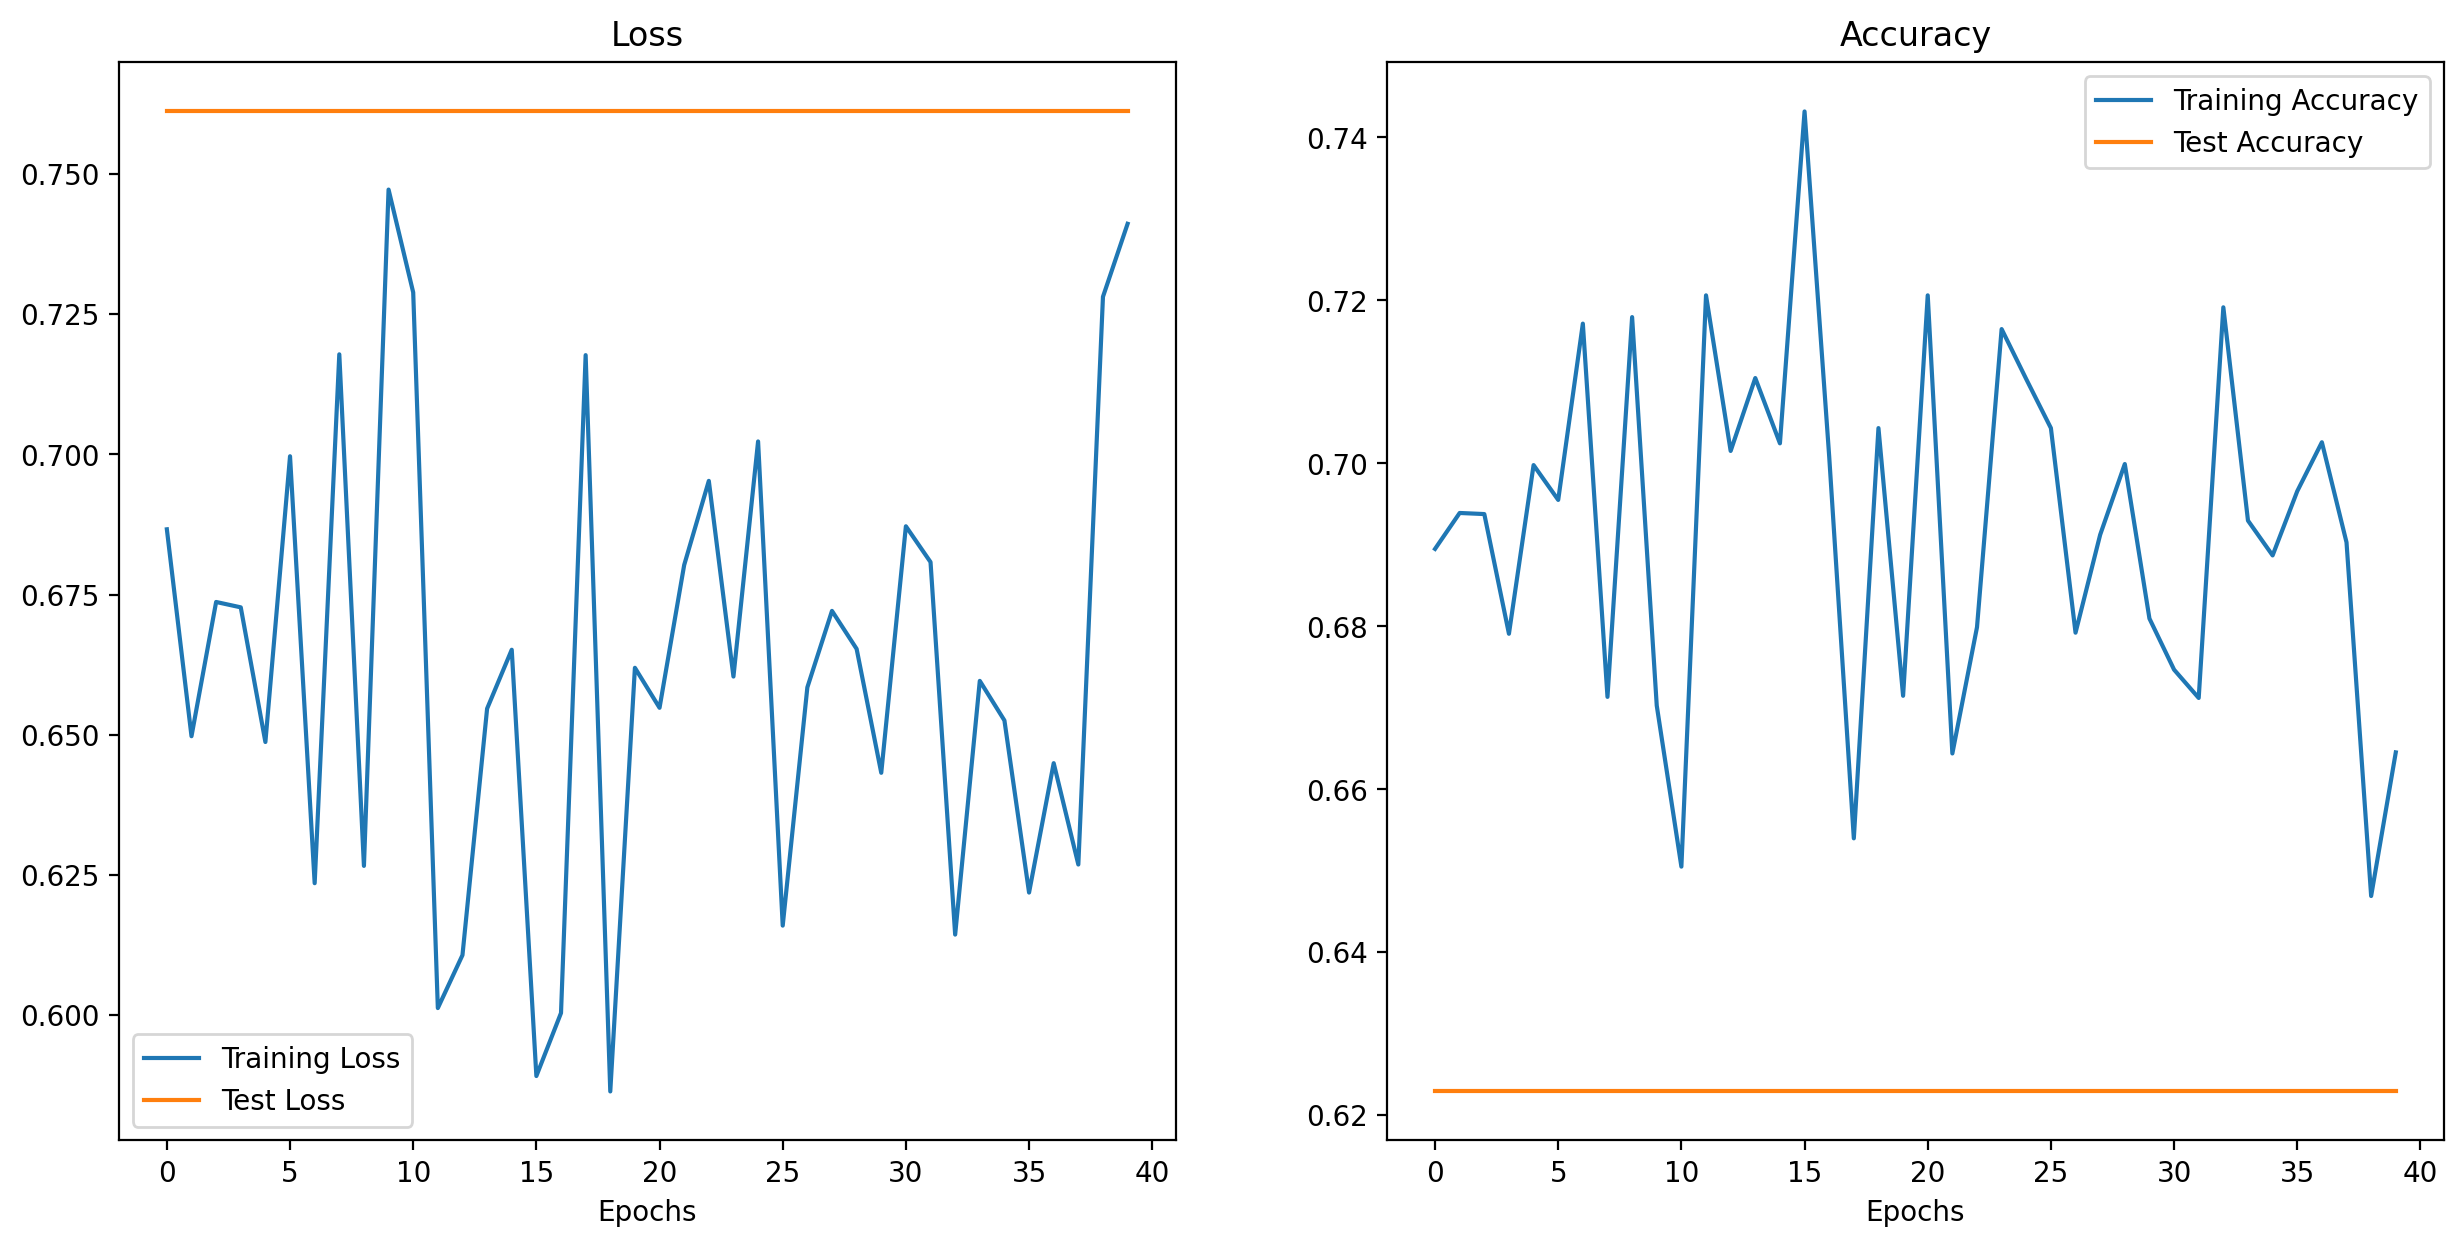

In [67]:
plot_loss_curves(model_1_results)

In [68]:
### making prediction on a custom image 
custom_image_path = image_path/"Cat.jpg"
custom_image_path

WindowsPath('data/Cat.jpg')

The code is importing the `torchvision` library, which is a popular computer vision library in PyTorch. It then reads an image file specified by the `custom_image_path` variable using the `torchvision.io.read_image()` function.


In [70]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[157, 157, 156,  ..., 180, 179, 179],
         [158, 158, 158,  ..., 180, 180, 180],
         [157, 157, 157,  ..., 181, 181, 181],
         ...,
         [194, 200, 194,  ..., 227, 241, 254],
         [174, 169, 173,  ..., 253, 251, 252],
         [199, 182, 178,  ..., 253, 251, 251]],

        [[161, 161, 160,  ..., 192, 191, 191],
         [162, 162, 162,  ..., 192, 192, 192],
         [161, 161, 161,  ..., 193, 193, 193],
         ...,
         [180, 186, 181,  ..., 229, 243, 255],
         [157, 153, 159,  ..., 253, 253, 254],
         [182, 166, 164,  ..., 253, 253, 253]],

        [[173, 173, 172,  ..., 208, 207, 207],
         [174, 174, 174,  ..., 208, 208, 208],
         [173, 173, 173,  ..., 209, 209, 209],
         ...,
         [171, 175, 165,  ..., 226, 240, 253],
         [147, 140, 146,  ..., 251, 250, 251],
         [172, 153, 151,  ..., 251, 250, 250]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1602, 1200])
Custom image data

`plt.imshow(custom_image_uint8.permute(1,2,0))` is a code snippet that uses the `imshow` function from the `matplotlib.pyplot` library to display an image.


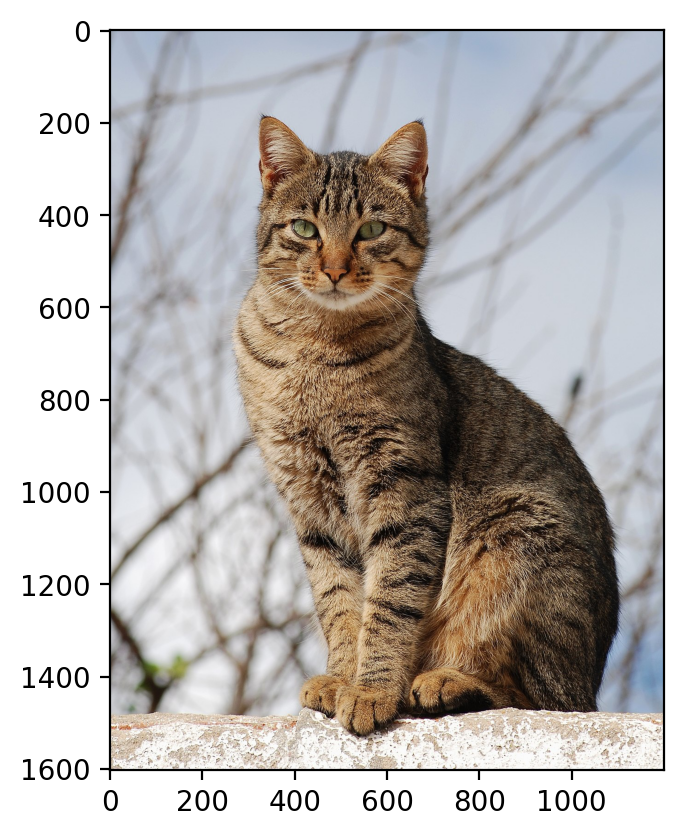

In [71]:
plt.imshow(custom_image_uint8.permute(1,2,0))

The code is creating a custom image transformation pipeline using the `transforms.Compose` function from the `torchvision.transforms` module.


In [89]:
custom_image_transform = transforms.Compose([transforms.Resize(size = (64,64))])

The `pred_and_plot` function takes in a trained model, an image path, and optional arguments such as class names, a transformation function, and a device.


In [ ]:
def pred_and_plot(model:torch.nn.Module,
                  image_path: str,
                  class_names:List[str] = None,
                  transform = None,
                  device = device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image/255
    
    if transform:
        target_image = transform(target_image)
         
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)
        target_image_pred = model(target_image.to(device))
    target_image_pred_probs = torch.softmax(target_image_pred, dim =1)
    target_image_pred_labels = torch.argmax(target_image_pred_probs, dim = 1)
    
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_labels.cpu()]} | prob: {target_image_pred_probs.max().cpu():3f}"
    else:
        title = f"pred: {target_image_pred_labels} | prob: {target_image_pred_probs.max().cpu():3f}"
    plt.title(title)
    plt.axis(False)

The `pred_and_plot` function is being called with several arguments. It is likely a function that takes in a model (`model_0`), an image path (`custom_image_path`), a list of class names (`class_names`), a transformation function (`custom_image_transform`), and a device (`device`).


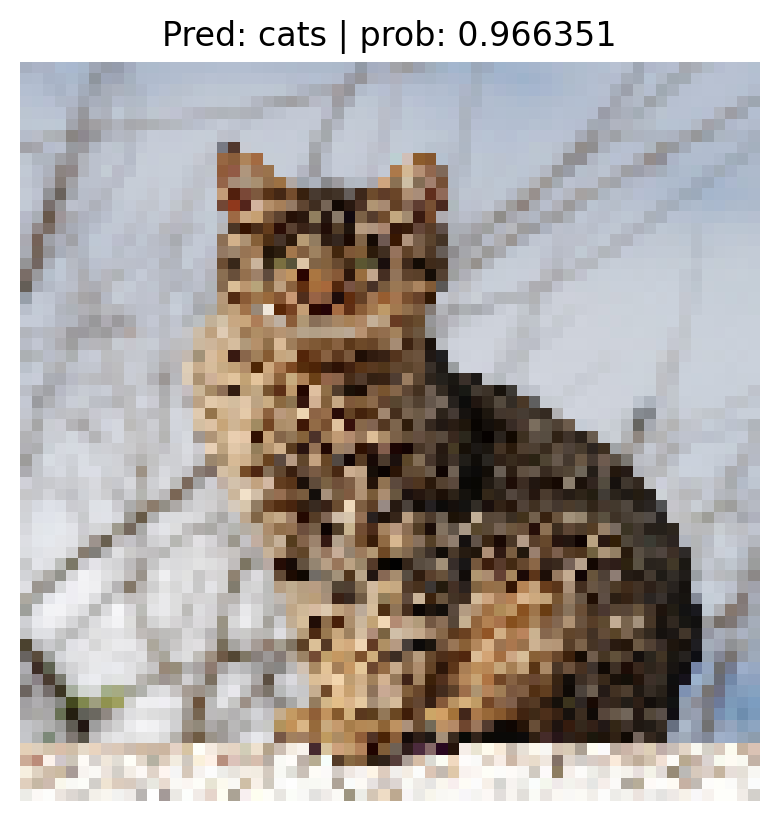

In [102]:
pred_and_plot(model = model_0,image_path=custom_image_path,class_names=class_names,transform=custom_image_transform,device=device)

In [112]:
# new_model = model_0
PATH = "model1.pth"

In [105]:
# torch.save(new_model.state_dict(), PATH)

The code `new_model.load_state_dict(torch.load(PATH))` is loading the saved state dictionary of the model from the specified file path `PATH`. This state dictionary contains the parameters and buffers of the model.


In [114]:

new_model.load_state_dict(torch.load(PATH))
new_model.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=2, bias=True)
  )
)

C:\Users\ankit\miniconda3\envs\ds\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


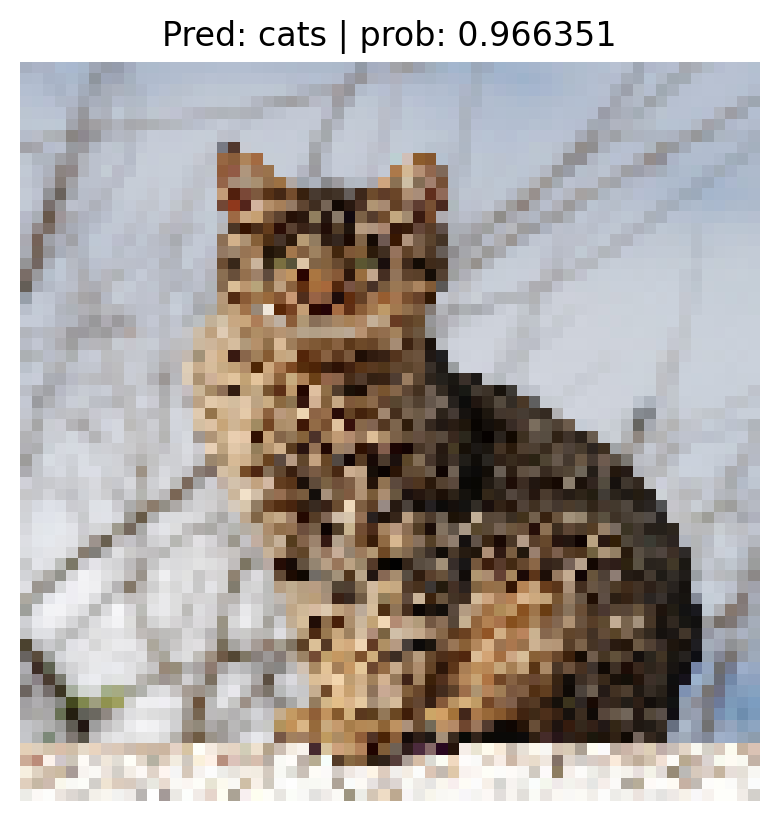

In [115]:
# new_model = model_0
# PATH = "model1.pth"
# new_model.load_state_dict(torch.load(PATH))
# new_model.eval()


# Call the prediction function
pred_and_plot(model = new_model, image_path=custom_image_path,class_names=class_names,transform=custom_image_transform,device=device)